In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
import seaborn
import datetime

# Downloading APPLE Stocks price data

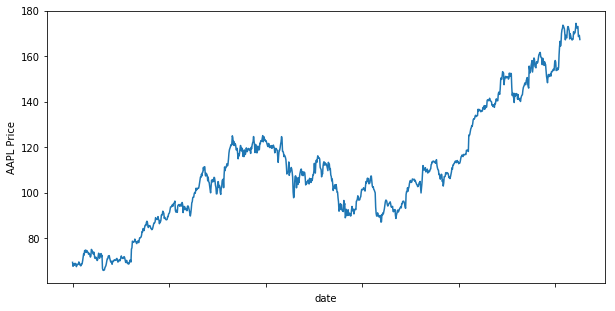

In [5]:
# Fetch the Data
from iexfinance import get_historical_data 
from datetime import datetime

train_start = datetime(2013, 1, 1) # starting date: year-month-date
train_end = datetime(2018, 1, 1) # ending date: year-month-date

train_df = get_historical_data('AAPL', start=train_start, end=train_end, output_format='pandas')
train_df=train_df.dropna()
train_df.close.plot(figsize=(10,5))
plt.ylabel("AAPL Price")
plt.show()


In [6]:
train_df.shape

(1052, 5)

In [7]:
training_set = train_df.iloc[:, 0:1].values
training_set

array([[ 69.2006],
       [ 70.1463],
       [ 67.9671],
       ...,
       [168.1687],
       [169.0585],
       [168.5839]])

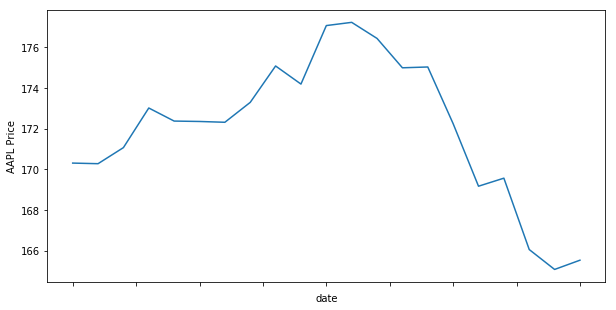

In [8]:
test_start = datetime(2018, 1, 1) # starting date: year-month-date
test_end = datetime(2018, 1, 31) # ending date: year-month-date

test_df = get_historical_data('AAPL', start=test_start, end=test_end, output_format='pandas') 
test_df=test_df.dropna()
test_df.close.plot(figsize=(10,5))
plt.ylabel("AAPL Price")
plt.show()


In [9]:

test_df.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,168.2280,170.3437,167.3382,170.3042,25555934
2018-01-03,170.5711,172.5682,170.0076,170.2745,29517899
2018-01-04,170.5810,171.5005,170.1262,171.0654,22434597
2018-01-05,171.4708,173.3789,171.0852,173.0131,23660018
2018-01-08,172.3705,173.6162,171.9552,172.3705,20567766


In [10]:
real_stock_price = test_df.iloc[:, 0:1].values

In [49]:

real_stock_price.shape

(21, 1)

# Feature Scaling

In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
training_set_scaled

array([[0.03751713],
       [0.04627589],
       [0.02609288],
       ...,
       [0.95412607],
       [0.9623671 ],
       [0.95797151]])

In [14]:
X_train = []
y_train = []
for i in range(60, 1052):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
print(X_train)

[[0.03751713 0.04627589 0.02609288 ... 0.05582095 0.06791483 0.06672656]
 [0.04627589 0.02609288 0.03262327 ... 0.06791483 0.06672656 0.07167414]
 [0.02609288 0.03262327 0.03143593 ... 0.06672656 0.07167414 0.06688493]
 ...
 [0.8040279  0.80174675 0.79828011 ... 0.99139314 0.99606287 0.96053606]
 [0.80174675 0.79828011 0.80329808 ... 0.99606287 0.96053606 0.95412607]
 [0.79828011 0.80329808 0.8105055  ... 0.96053606 0.95412607 0.9623671 ]]


In [16]:
print(y_train)

[0.07167414 0.06688493 0.01654781 0.0106861  0.00896807 0.
 0.00905327 0.01300152 0.01386656 0.02185196 0.03572871 0.03239451
 0.04704275 0.05481421 0.052007   0.06158078 0.06590875 0.06437595
 0.04996017 0.04971845 0.03789779 0.04553495 0.03846182 0.03053106
 0.04516727 0.03822936 0.04752065 0.04742248 0.04971474 0.04763087
 0.04428463 0.05297577 0.05182362 0.05541529 0.04481162 0.04347516
 0.04126903 0.0490655  0.04616012 0.04866076 0.05661653 0.06039251
 0.06654596 0.05857167 0.05649428 0.05760938 0.05580706 0.06147057
 0.06025729 0.05832068 0.04386785 0.04039844 0.03727263 0.04712889
 0.03281128 0.03636591 0.03436724 0.03164617 0.0340366  0.04058274
 0.0442235  0.04514319 0.09313433 0.08862298 0.09876079 0.12442948
 0.12308098 0.12229652 0.1227133  0.1200163  0.13430982 0.12628089
 0.11827233 0.11372022 0.11733968 0.1228726  0.12339959 0.12618457
 0.11873819 0.13004946 0.13822009 0.13738562 0.14078372 0.14158115
 0.15216815 0.16460842 0.16685344 0.17928074 0.17434891 0.16760179
 0.

# Reshaping the data

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Building LSTM

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [23]:
regressor = Sequential()
# first LSTM  layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Second LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Third LSTM layer

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#  Fourth LSTM Layer

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 50)                20200     
__________

In [77]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [78]:
history=regressor.fit(X_train, y_train, epochs = 100,validation_split=0.1,verbose=1, batch_size = 32)

Train on 892 samples, validate on 100 samples
Epoch 1/100
892/892 [==============================] - 13s 15ms/step - loss: 9.8209e-04 - val_loss: 0.0011
Epoch 2/100
892/892 [==============================] - 6s 7ms/step - loss: 6.4265e-04 - val_loss: 0.0011
Epoch 3/100
892/892 [==============================] - 6s 7ms/step - loss: 7.0916e-04 - val_loss: 3.4346e-04
Epoch 4/100
892/892 [==============================] - 6s 7ms/step - loss: 6.3011e-04 - val_loss: 3.5069e-04
Epoch 5/100
892/892 [==============================] - 6s 7ms/step - loss: 6.7506e-04 - val_loss: 3.4189e-04
Epoch 6/100
892/892 [==============================] - 6s 7ms/step - loss: 6.5066e-04 - val_loss: 4.8283e-04
Epoch 7/100
892/892 [==============================] - 6s 7ms/step - loss: 6.6781e-04 - val_loss: 4.7831e-04
Epoch 8/100
892/892 [==============================] - 6s 7ms/step - loss: 7.2903e-04 - val_loss: 4.0259e-04
Epoch 9/100
892/892 [==============================] - 6s 7ms/step - loss: 7.6806e-04 - 

Epoch 76/100
892/892 [==============================] - 7s 8ms/step - loss: 6.8148e-04 - val_loss: 5.9288e-04
Epoch 77/100
892/892 [==============================] - 7s 8ms/step - loss: 6.2191e-04 - val_loss: 0.0013
Epoch 78/100
892/892 [==============================] - 7s 8ms/step - loss: 6.6975e-04 - val_loss: 3.7888e-04
Epoch 79/100
892/892 [==============================] - 7s 8ms/step - loss: 6.1940e-04 - val_loss: 0.0015
Epoch 80/100
892/892 [==============================] - 7s 8ms/step - loss: 6.4119e-04 - val_loss: 0.0013
Epoch 81/100
892/892 [==============================] - 7s 8ms/step - loss: 6.7005e-04 - val_loss: 9.6864e-04
Epoch 82/100
892/892 [==============================] - 7s 8ms/step - loss: 6.6364e-04 - val_loss: 5.5127e-04
Epoch 83/100
892/892 [==============================] - 6s 7ms/step - loss: 6.2896e-04 - val_loss: 6.1473e-04
Epoch 84/100
892/892 [==============================] - 6s 7ms/step - loss: 6.5113e-04 - val_loss: 9.0177e-04
Epoch 85/100
892/892 [

In [79]:
def plot_model_history(model_history):
    plt.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    plt.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    plt.title('Model Loss Analysis')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
   
    plt.legend(['train', 'val'], loc='best')
    plt.show()
   
    

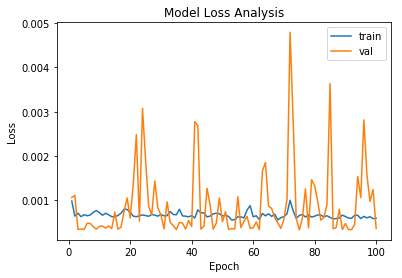

In [80]:
plot_model_history(history)

In [81]:
# Getting the predicted stock price of 2018
dataset_total = pd.concat((train_df['open'], test_df['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_df) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [82]:
predicted_stock_price.shape

(21, 1)

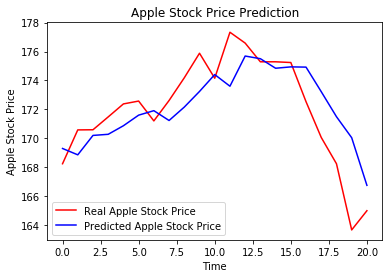

In [83]:
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [84]:

def cal_target(df):
    list_y =[]
    temp = df
    for i in range(len(temp)-1):
        if temp[i+1] > temp[i]:
            y = 1
        else:
            y = -1
            
        list_y.append(y)
    ydf = pd.DataFrame(list_y)
    return ydf

In [85]:
real_stock_price_trend = cal_target(real_stock_price)
predicted_stock_price_trend =cal_target(predicted_stock_price)

# Stock Price Trend Prediction

In [86]:
real_df = pd.DataFrame(real_stock_price_trend)
pred_df = pd.DataFrame(predicted_stock_price_trend)
acc_df = pd.concat((real_df[0],pred_df[0]), axis=1)
acc_df.head(19)

,0,0
0,1,-1
1,1,1
2,1,1
3,1,1
4,1,1
5,-1,1
6,1,-1
7,1,1
8,1,1
9,-1,1


In [88]:
from sklearn.metrics import accuracy_score
score = accuracy_score(real_stock_price_trend, predicted_stock_price_trend)
print(score)

0.6


In [89]:
from sklearn.metrics import classification_report
print(classification_report(real_stock_price_trend, predicted_stock_price_trend))

             precision    recall  f1-score   support

         -1       0.60      0.60      0.60        10
          1       0.60      0.60      0.60        10

avg / total       0.60      0.60      0.60        20

